<a href="https://colab.research.google.com/github/mrdbourke/tensorflow-deep-learning/blob/main/03_convolutional_neural_networks_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-05-11 04:00:59--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 172.217.218.128, 142.250.153.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  35.8MB/s    in 15s     

2023-05-11 04:01:15 (32.1 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



Now let's check out all of the different directories and sub-directories in the `10_food_classes` file.

In [ ]:
import os
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 

In [ ]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

And get the class names from the subdirectories.

In [ ]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 384, 3)


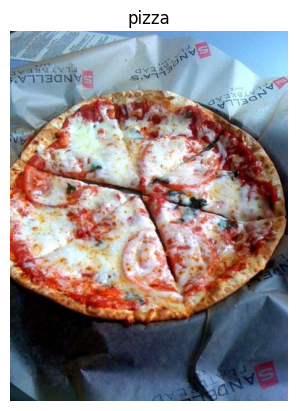

In [ ]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocess the data (prepare it for a model)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model ( a baseline)



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

# Compile the model
model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

### 4. Fit a model

Now we've got a model suited for working with multiple classes, let's fit it to our data.

In [ ]:
# Fit the model
history_9 = model_9.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 48s 194ms/step - loss: 2.1520 - accuracy: 0.2133 - val_loss: 1.9674 - val_accuracy: 0.2964
Epoch 2/5
235/235 [==============================] - 45s 193ms/step - loss: 1.8770 - accuracy: 0.3489 - val_loss: 1.8792 - val_accuracy: 0.3424
Epoch 3/5
235/235 [==============================] - 45s 190ms/step - loss: 1.5239 - accuracy: 0.4860 - val_loss: 1.9865 - val_accuracy: 0.3184
Epoch 4/5
235/235 [==============================] - 45s 193ms/step - loss: 0.9507 - accuracy: 0.6897 - val_loss: 2.4049 - val_accuracy: 0.2824
Epoch 5/5
235/235 [==============================] - 45s 190ms/step - loss: 0.3835 - accuracy: 0.8772 - val_loss: 3.6373 - val_accuracy: 0.2760


### 5. Evaluate the model



In [ ]:
# Evaluate on the test data
model_9.evaluate(test_data)

79/79 [==============================] - 11s 139ms/step - loss: 3.6373 - accuracy: 0.2760


[3.6373109817504883, 0.2759999930858612]

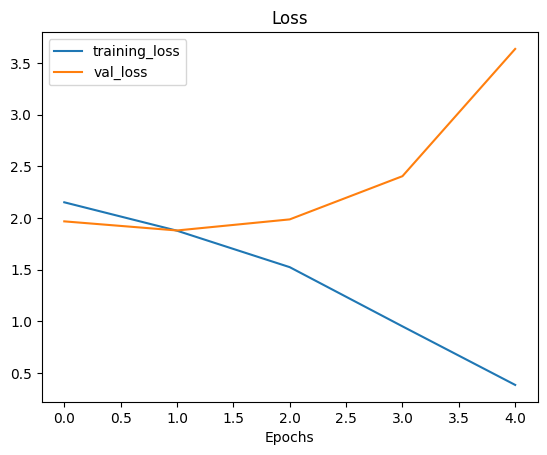

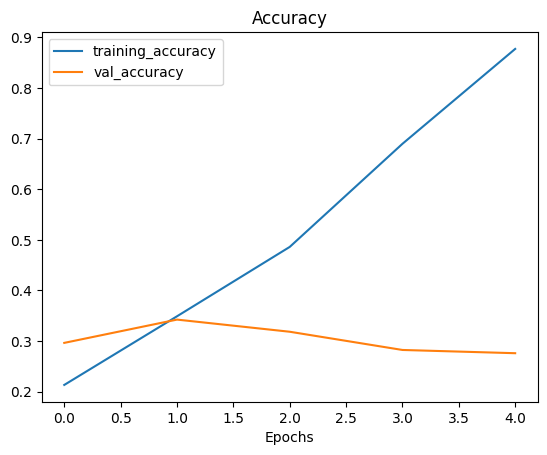

In [ ]:
plot_loss_curves(history_9)


our model is **overfitting** the training set .



So our next steps will be to try and prevent our model overfitting.Some ways to prevent overfitting include:

- **Get more data**
- **Simplify model**
- **Use data augmentation**
- **Use transfer learning**


In [ ]:
# Try a simplified model (removed two layers)
model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 46s 193ms/step - loss: 2.2804 - accuracy: 0.2397 - val_loss: 1.9445 - val_accuracy: 0.3024
Epoch 2/5
235/235 [==============================] - 45s 192ms/step - loss: 1.8253 - accuracy: 0.3785 - val_loss: 1.9529 - val_accuracy: 0.3172
Epoch 3/5
235/235 [==============================] - 44s 186ms/step - loss: 1.5193 - accuracy: 0.4979 - val_loss: 2.0705 - val_accuracy: 0.3160
Epoch 4/5
235/235 [==============================] - 44s 187ms/step - loss: 1.1143 - accuracy: 0.6408 - val_loss: 2.2653 - val_accuracy: 0.3064
Epoch 5/5
235/235 [==============================] - 44s 188ms/step - loss: 0.7340 - accuracy: 0.7787 - val_loss: 2.5814 - val_accuracy: 0.2944


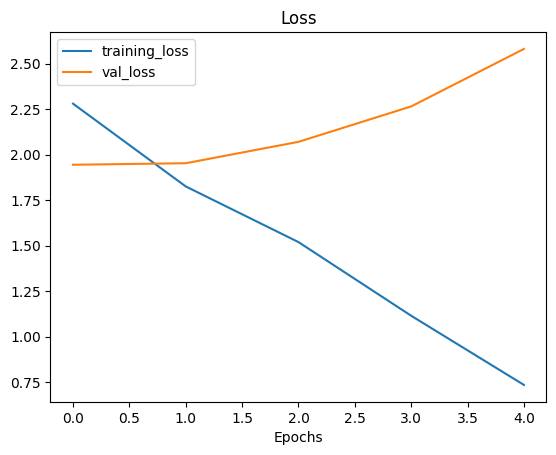

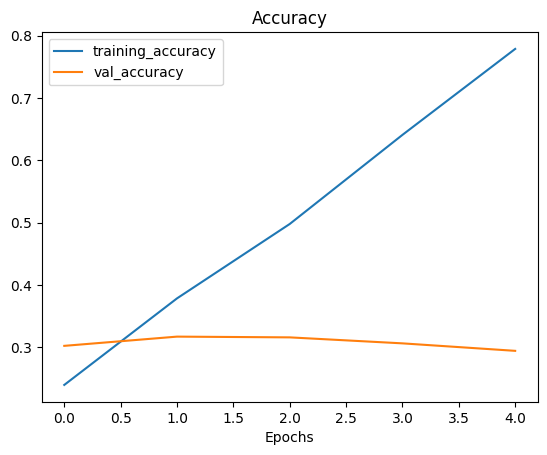

In [ ]:
# Check out the loss curves of model_10
plot_loss_curves(history_10)

our model is still overfitting the training data.

Now Using **data augmentation**

In [ ]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [ ]:
# Clone the model (use the same architecture)
model_11 = tf.keras.models.clone_model(model_10)

# Compile the cloned model (same setup as used for model_10)
model_11.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_11 = model_11.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 112s 473ms/step - loss: 2.1903 - accuracy: 0.1997 - val_loss: 2.0500 - val_accuracy: 0.2668
Epoch 2/5
235/235 [==============================] - 114s 483ms/step - loss: 2.0740 - accuracy: 0.2592 - val_loss: 1.9318 - val_accuracy: 0.3236
Epoch 3/5
235/235 [==============================] - 114s 485ms/step - loss: 2.0149 - accuracy: 0.3044 - val_loss: 1.8862 - val_accuracy: 0.3348
Epoch 4/5
235/235 [==============================] - 114s 487ms/step - loss: 1.9739 - accuracy: 0.3172 - val_loss: 1.8206 - val_accuracy: 0.3868
Epoch 5/5
235/235 [==============================] - 115s 489ms/step - loss: 1.9415 - accuracy: 0.3292 - val_loss: 1.8619 - val_accuracy: 0.3696


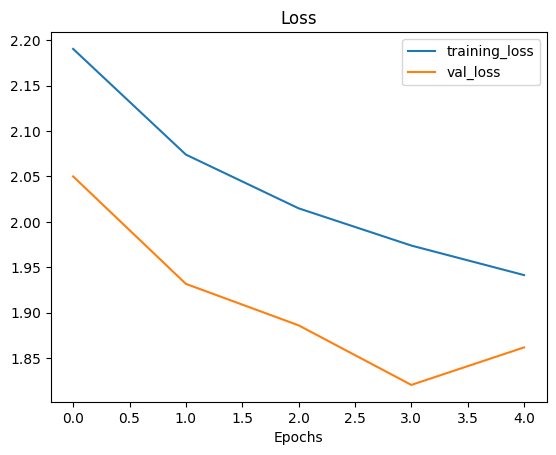

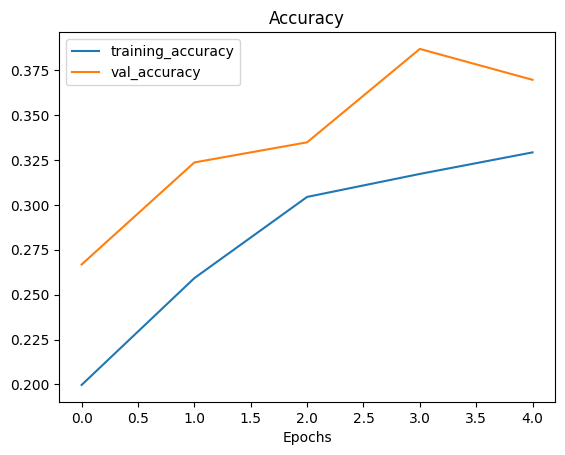

In [ ]:
# Check out our model's performance with augmented data
plot_loss_curves(history_11)

In [ ]:
# classes on our model been trained on
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

1/1 [==============================] - 0s 81ms/step


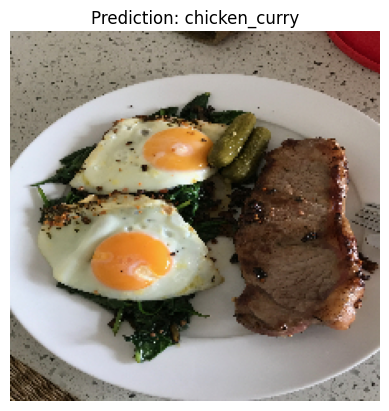

In [ ]:
# Make a prediction using model_11
pred_and_plot(model=model_11,
              filename="03-steak.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 23ms/step


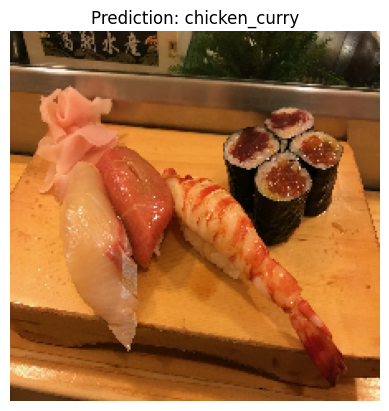

In [ ]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

1/1 [==============================] - 0s 22ms/step


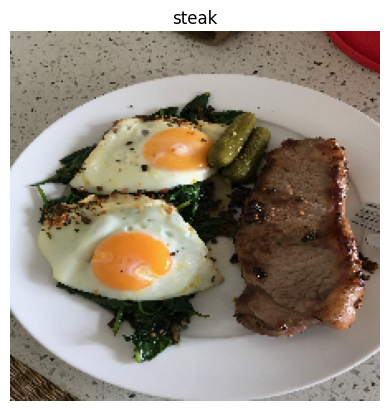

In [ ]:
# Load in and preprocess our custom image
img = load_and_prep_image("03-steak.jpeg")

# Make a prediction
pred = model_11.predict(tf.expand_dims(img, axis=0))

# Match the prediction class to the highest prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);

In [ ]:
# Check the output of the predict function
pred = model_11.predict(tf.expand_dims(img, axis=0))
pred

1/1 [==============================] - 0s 22ms/step


array([[0.00413127, 0.00698275, 0.00470221, 0.14550138, 0.0163848 ,
        0.00341261, 0.00258247, 0.2162087 , 0.5952408 , 0.00485306]],
      dtype=float32)

In [ ]:
# Find the predicted class name
class_names[pred.argmax()]

'steak'

In [ ]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 23ms/step


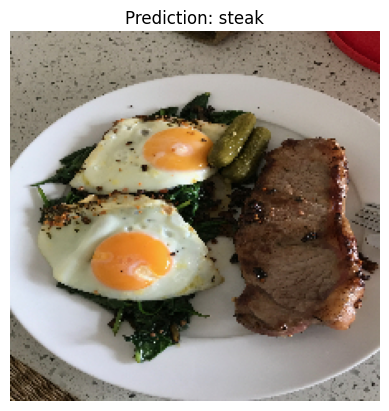

In [ ]:
pred_and_plot(model_11, "03-steak.jpeg", class_names)

1/1 [==============================] - 0s 22ms/step


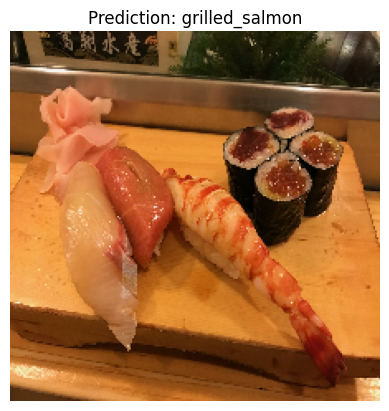

In [ ]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)